## Final Project Submission

Project Details:
* Project by: Vikas Bansal 
* Student Pace: part time
* Instructor name: Yish


#### As an Analyst for a REIT, our goal in this project was to identify factors that affect home prices. Through this project we are looking to predict house prices for other counties, by creating a regression model from the King's County Data. 

#### Project Results / Conclusion

As you go through the notebook, you will see that we looked at several variables and tried to determine how they affect housing prices. Below are key pointers:

1. We conducted tests on 4 different Models of Linear Multiple Regression. Following an Iterative modeling process, we got the following results from our final model:

1. R-Squared: 0.946
2. Adjusted R-Squared: 0.946
3. P-values: All variables have P-values less than 0.05
4. RMSE Results: 
    4.1 Avg. Residual: 121076; 
    4.2 Standard Deviation: 1968
5. Q-Q Plot Results:The Model might need further refinement to be used for higher priced homes. 

#### Key Takeaways:

1. Every 1 unit increase in the sqft of a house results in an increase of approx. $98 in the price of the house.
2. Sqft of the plot does not seem to have a significant impact on the price of the houses. However, this needs to be further explored for accuracy.

#### Future/Next Steps:

The Model will need further analysis as their are variables that were left our during this project, such as the neighborhood data. It would be a good exercise to check how pricing changes depending on the location in a specific area.  


For reference, below are the Column Names and descriptions for Kings County Data Set:

1. **id** - unique identified for a house
2. **dateDate** - house was sold
3. **pricePrice** -  is prediction target
4. **bedroomsNumber** -  of Bedrooms/House
5. **bathroomsNumber** -  of bathrooms/bedrooms
6. **sqft_livingsquare** -  footage of the home
7. **sqft_lotsquare** -  footage of the lot
8. **floorsTotal** -  floors (levels) in house
9. **waterfront** - House which has a view to a waterfront
10. **view** - Has been viewed
11. **condition** - How good the condition is ( Overall )
12. **grade** - overall grade given to the housing unit, based on King County grading system
13. **sqft_above** - square footage of house apart from basement
14. **sqft_basement** - square footage of the basement
15. **yr_built** - Built Year
16. **yr_renovated** - Year when house was renovated
17. **zipcode** - zip
18. **lat** - Latitude coordinate
19. **long** - Longitude coordinate
20. **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
21. **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [301]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import scipy.stats as stats

In [302]:
data = pd.read_csv('kc_house_data.csv')

In [303]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [304]:
#Checking Shape of the Dataset
data.shape

(21597, 21)

The Dataset has 21,597 house prices for home sales in the King County Area. 

# Train-Test-Split

We will begin by spliting our dataset into a training set and a Testing set. For this dataset, we will use 10% of the dataset as the testing set. 

In [305]:
#Split features (X) and target (Y)
x = data.drop('price', axis=1)
y = data['price']

In [306]:
#Split X and Y into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=42) 

In [307]:
#Preview the datasets
print(len(x_train), len(x_test), len(y_train),len(y_test))

19437 2160 19437 2160


In [308]:
#create a Dataframe with the training features and target.
df = pd.concat([x_train,y_train],axis=1)

In [309]:
#Investigate df
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
13820,9393700065,4/23/2015,3,1.75,1300,5120,1.5,0.0,0.0,4,...,1300,0.0,1925,0.0,98116,47.5589,-122.394,1090,5124,515000.0
1703,7978800621,8/11/2014,3,1.00,1370,56628,1.0,0.0,0.0,3,...,1370,0.0,1942,0.0,98003,47.3058,-122.306,1768,8702,229000.0
4375,223039330,4/7/2015,3,3.00,3250,5093,2.0,0.0,3.0,3,...,3250,0.0,2004,0.0,98146,47.5123,-122.390,2820,7752,1050000.0
11872,5631501323,8/5/2014,3,1.50,1340,13560,1.0,0.0,0.0,3,...,1340,0.0,1968,0.0,98028,47.7410,-122.234,1540,15000,309500.0
9625,1773101050,2/20/2015,3,1.00,960,4560,1.0,0.0,0.0,4,...,960,0.0,1968,NaN,98106,47.5539,-122.365,970,4800,290000.0


In [310]:
df.shape

(19437, 21)

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19437 entries, 13820 to 15795
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19437 non-null  int64  
 1   date           19437 non-null  object 
 2   bedrooms       19437 non-null  int64  
 3   bathrooms      19437 non-null  float64
 4   sqft_living    19437 non-null  int64  
 5   sqft_lot       19437 non-null  int64  
 6   floors         19437 non-null  float64
 7   waterfront     17299 non-null  float64
 8   view           19376 non-null  float64
 9   condition      19437 non-null  int64  
 10  grade          19437 non-null  int64  
 11  sqft_above     19437 non-null  int64  
 12  sqft_basement  19437 non-null  object 
 13  yr_built       19437 non-null  int64  
 14  yr_renovated   15998 non-null  float64
 15  zipcode        19437 non-null  int64  
 16  lat            19437 non-null  float64
 17  long           19437 non-null  float64
 18  sq

1. We can note that the Date column should be changed to Date_time datatype. 
2. Sqft Basement is an object datatype. This should be a float type object.

In [312]:
df['date'] = pd.to_datetime(df['date'])

In [313]:
#Checking the sqft_basement column. 
df.sqft_basement.value_counts()

0.0       11553
?           415
600.0       196
500.0       188
800.0       186
          ...  
1960.0        1
20.0          1
666.0         1
704.0         1
2240.0        1
Name: sqft_basement, Length: 296, dtype: int64

We note that much of the dataset has a value 0, indicating that their is no basement that exists. Their are also 415 entries with the value "?". Lets assign the value 0, to all unknown values. 

In [314]:
df['sqft_basement'] = df['sqft_basement'].map(lambda x: float(x.replace("?","0")))

In [315]:
df.sqft_basement.value_counts()

0.0       11968
600.0       196
500.0       188
800.0       186
700.0       179
          ...  
2220.0        1
2850.0        1
274.0         1
1008.0        1
1920.0        1
Name: sqft_basement, Length: 295, dtype: int64

In [316]:
#Check Dataset again to confirm Date and Sqft_basement have corrected.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19437 entries, 13820 to 15795
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             19437 non-null  int64         
 1   date           19437 non-null  datetime64[ns]
 2   bedrooms       19437 non-null  int64         
 3   bathrooms      19437 non-null  float64       
 4   sqft_living    19437 non-null  int64         
 5   sqft_lot       19437 non-null  int64         
 6   floors         19437 non-null  float64       
 7   waterfront     17299 non-null  float64       
 8   view           19376 non-null  float64       
 9   condition      19437 non-null  int64         
 10  grade          19437 non-null  int64         
 11  sqft_above     19437 non-null  int64         
 12  sqft_basement  19437 non-null  float64       
 13  yr_built       19437 non-null  int64         
 14  yr_renovated   15998 non-null  float64       
 15  zipcode        

Looks good. moving forward, lets check for null values.

In [317]:
#Checking for NA Values in the dataset. 
df.isnull().sum()

id                  0
date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2138
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3439
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
price               0
dtype: int64

It would be a good idea to analyze the null values. We will use the describe function to get some stats about the null values.

In [318]:
df[['waterfront','view','yr_renovated']].describe()

,waterfront,view,yr_renovated
count,17299.000000,19376.000000,15998.000000
mean,0.007746,0.233072,83.090761
std,0.087673,0.765698,398.696622
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,4.000000,2015.000000


Based on the stats, we will assign 0 value to the null values, as most of the values in these columns are zero.

In [319]:
df = df.fillna(0)

In [320]:
#Confirm for any other null values
df.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

# EDA


We will begin the EDA for our training Dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa84cdef278>,
      dtype=object)

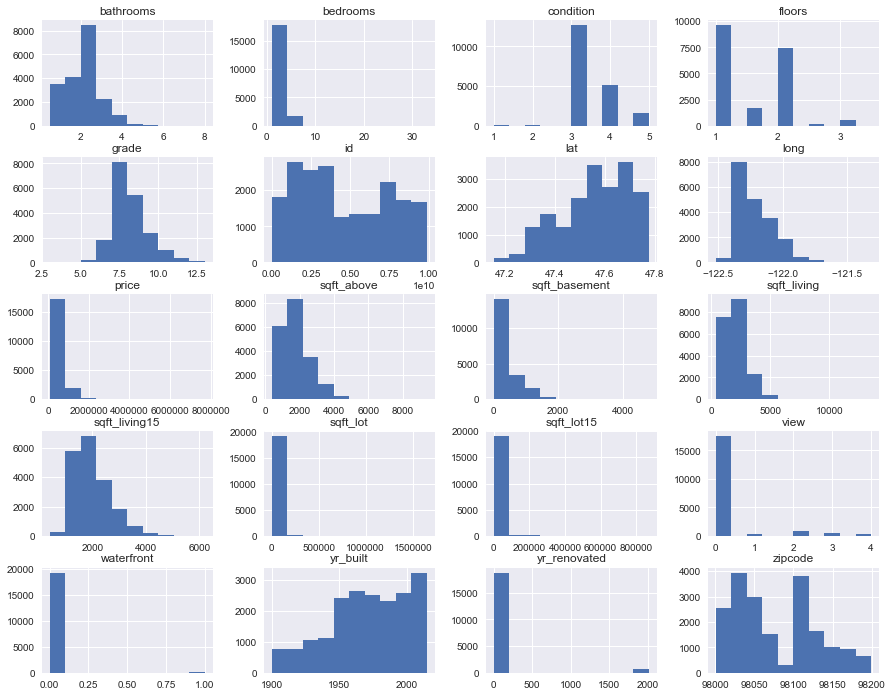

In [321]:
df.hist(figsize=(15,12))

The histogram above gives a good idea and we can make the below observbations:

1. Floors, Condition, waterfront, and Grade look like Categorical Variables and seem to not have any outliers. 
2. Sqft_lot15 and price seem to have big outliers. 


Investigating Linearity assumptions for our variables. From our the histogram above, we can confortably say that some of our data is continous and some of it categorical. 

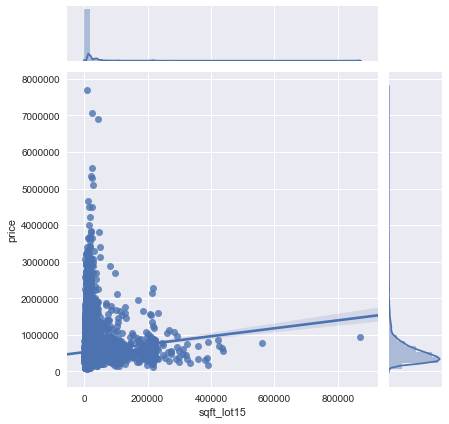

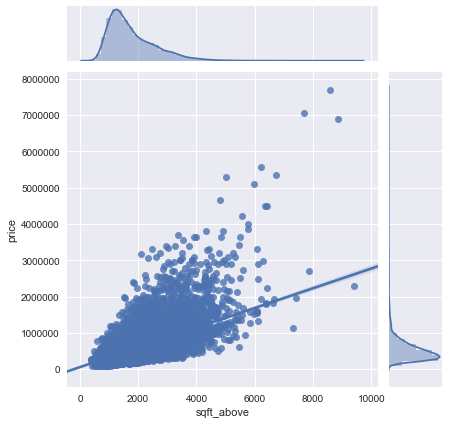

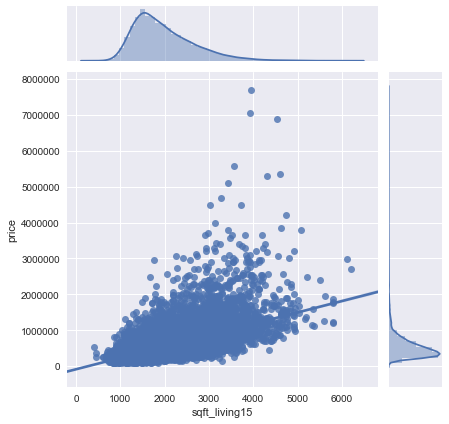

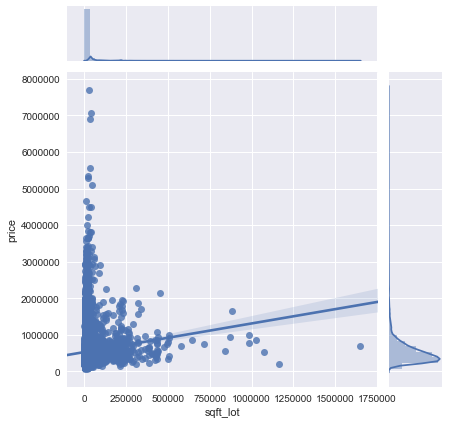

In [322]:
#Plotting Scatter plots for the Continuous Variables
cont_var = ['sqft_lot15', 'sqft_above', 'sqft_living15', 'sqft_lot']

#Using Seaborn Joint plots to check for normality alongside the scatter plots
for plot in cont_var:
    sns.jointplot(x = df[plot], y = df['price'], kind = 'reg')

We can see that their are some outliers in the sqft_lot and sqft_lot15 that are affecting the scatter plots. It would be a good idea to get rid of the outliers to focus better on the median and average set of data. 

We will use a z-score of 3 to remove any outliers from the dataset and will also check how many values get affected by this exercise. We will remove the outliers from the complete dataset. We want to eliminate the outliers, but not at the expense of losing valuable data. 

In [323]:
#creating a function to remove outliers
def outliers(df1):
    variables = ['sqft_living', 'sqft_lot15', 'sqft_lot', 'sqft_living15', 'sqft_above', 'bathrooms','bedrooms', 'yr_built', 'grade']
    
    for variable in variables:
        df1 = df1[np.abs(df1[variable]-df1[variable].mean()) <= (3*df1[variable].std())]
        
    return df1

In [324]:
#We create a new dataframe df_opt to test the function
df_opt = outliers(df)
print(len(df_opt)/len(df))

0.9311107681226527


This tell us that the new DataFrame is rouhgly 94% the size of our original Dataframe. Hence the exercise to remove outliers, remove approximately 7% of our data. We chose to go ahead with this and priceed with **df_opt**

Lets check our scatter plots again to see if removing the outliers made our data any better.

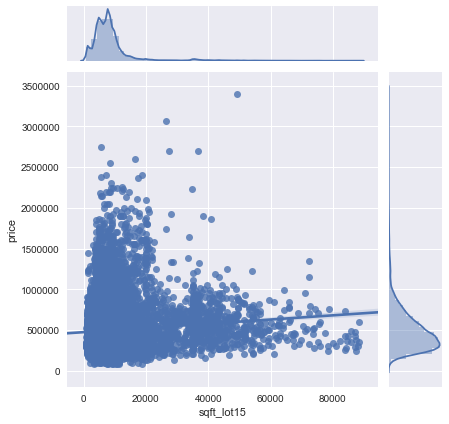

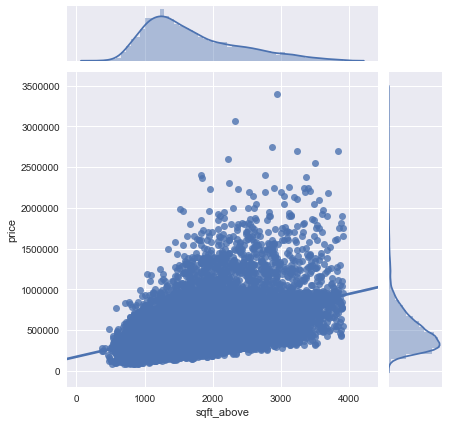

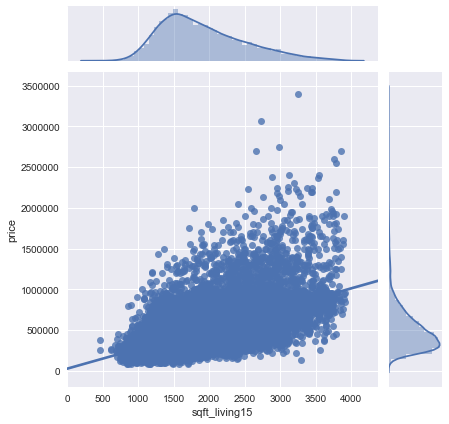

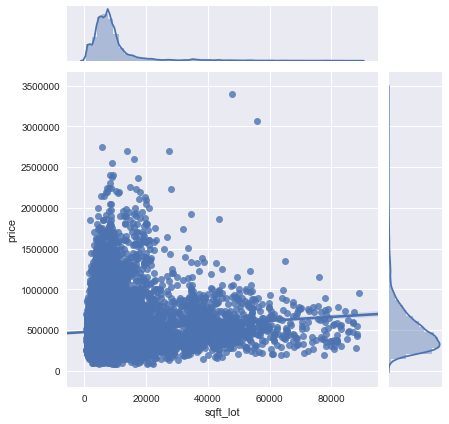

In [325]:
cont_var = ['sqft_lot15', 'sqft_above', 'sqft_living15', 'sqft_lot']

#Using Seaborn Joint plots to check for normality alongside the scatter plots
for plot in cont_var:
    sns.jointplot(x = df_opt[plot], y = df_opt['price'], kind = 'reg')

As you can see, the sqft_lot and sqft_living plots have improved a lot. Moving forward we will check the Multicollinearity of our dataset. 

# Multicollinearity

We will use the Correlation Matrix and a heatmap to check multicollinearity. 

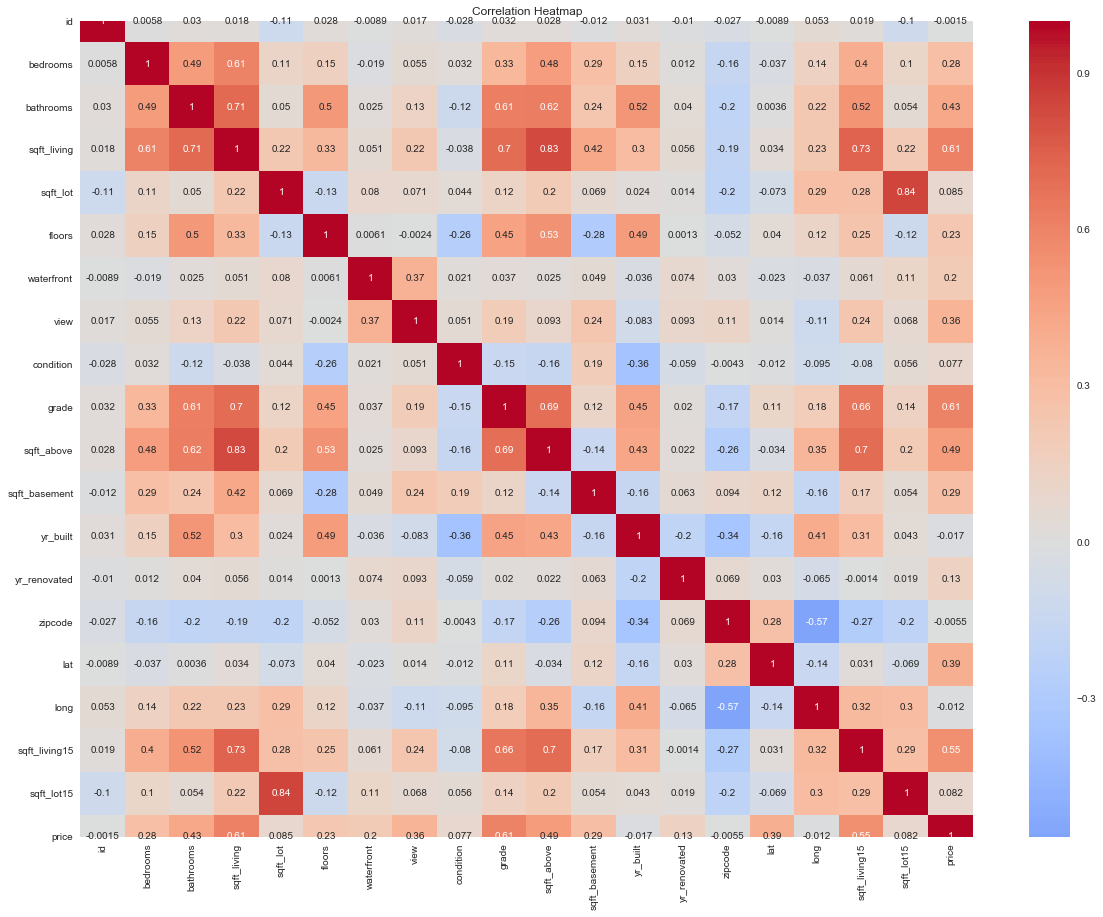

In [326]:
corr = df_opt.corr()

plt.figure(figsize = (20,15))
sns.heatmap(corr, center = 0,annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The heatmap suggests that we have correlation issues with some of our variables. It seems clear that sqft_living is highly correlated to sqft_above. This makes sense because sqft_living consists of sqft_above and sqft_basement and because many houses donot have a basement, it does not make sense to use both these variables going forward. 

We will go forward with using sqft_living and will drop sqft_above. We also see that sqft_living15 is highly correlated to sqft_living. We will drop this variable as well. 

Finally, we note that sqft_lot and sqft_lot15 are correlated heavily, hence we will chose to go forward with sqft_lot as it is the more directly related to the house.  

In [327]:
df_opt = df_opt.drop(['sqft_above','sqft_living15', 'sqft_lot15'], axis = 1)

Before moving forward, lets save a copy of our dataset. 

In [328]:
df_opt.to_csv('df optimized')

In [329]:
#Preview our new Dataset. 
df_opt.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price
13820,9393700065,2015-04-23,3,1.75,1300,5120,1.5,0.0,0.0,4,6,0.0,1925,0.0,98116,47.5589,-122.394,515000.0
1703,7978800621,2014-08-11,3,1.00,1370,56628,1.0,0.0,0.0,3,7,0.0,1942,0.0,98003,47.3058,-122.306,229000.0
4375,223039330,2015-04-07,3,3.00,3250,5093,2.0,0.0,3.0,3,10,0.0,2004,0.0,98146,47.5123,-122.390,1050000.0
11872,5631501323,2014-08-05,3,1.50,1340,13560,1.0,0.0,0.0,3,7,0.0,1968,0.0,98028,47.7410,-122.234,309500.0
9625,1773101050,2015-02-20,3,1.00,960,4560,1.0,0.0,0.0,4,7,0.0,1968,0.0,98106,47.5539,-122.365,290000.0


# One hot Encoding

We will create a function to perform one hot encoding on the categorical variables. We will call this function multiple times in the future for our modeling exercises. 

In [330]:
def one_hot_encoding(df, dummy):
    var = df[dummy].astype('category')
    var = pd.get_dummies(var)
    df = pd.concat([df, var], axis = 1)
    df = df.drop(dummy, axis = 1)
    return df

## Modeling

Calling in the dataframe from the backup df for our modeling.

In [331]:
df_opt = pd.read_csv('df optimized')
df_opt = df_opt.copy()

In [332]:
#Dropping unnceccassary columns from the Dataset
df_opt = df_opt.drop(['id', 'date', 'Unnamed: 0'], axis=1)
df_opt

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price
0,3,1.75,1300,5120,1.5,0.0,0.0,4,6,0.0,1925,0.0,98116,47.5589,-122.394,515000.0
1,3,1.00,1370,56628,1.0,0.0,0.0,3,7,0.0,1942,0.0,98003,47.3058,-122.306,229000.0
2,3,3.00,3250,5093,2.0,0.0,3.0,3,10,0.0,2004,0.0,98146,47.5123,-122.390,1050000.0
3,3,1.50,1340,13560,1.0,0.0,0.0,3,7,0.0,1968,0.0,98028,47.7410,-122.234,309500.0
4,3,1.00,960,4560,1.0,0.0,0.0,4,7,0.0,1968,0.0,98106,47.5539,-122.365,290000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18093,3,2.50,2230,5800,2.0,0.0,0.0,3,7,0.0,2004,0.0,98065,47.5308,-121.847,440000.0
18094,4,2.75,2770,3852,2.0,0.0,0.0,3,8,0.0,2014,0.0,98178,47.5001,-122.232,572000.0
18095,4,1.50,1530,9000,1.0,0.0,0.0,4,6,0.0,1976,0.0,98014,47.6492,-121.908,299800.0
18096,1,0.75,380,15000,1.0,0.0,0.0,3,5,0.0,1963,0.0,98168,47.4810,-122.323,245000.0


# Model 1: 

We'll begin modeling our price as the dependent variable. We will use one hot encoding for bathrooms, bedrooms, grade, and, condition. 

In [333]:
X_data = df_opt.drop('price', axis=1)
X_train_var = ['bathrooms', 'bedrooms', 'grade', 'condition']
y_train = df_opt['price']

In [334]:
X_train = one_hot_encoding(X_data, X_train_var)

In [335]:
X_int = sm.add_constant(X_train)
model = sm.OLS(y_train, X_int).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     989.3
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:39:39   Log-Likelihood:            -2.4148e+05
No. Observations:               18098   AIC:                         4.830e+05
Df Residuals:                   18058   BIC:                         4.834e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8.419e+06   1.49e+06      5.632      0.000    5.49e+06    1.13e+07
sqft_living      122.9800      3.270     37.605      0.000     116.570     129.390
sqft_lot          -1.0016      0.129     -7.790      0.000      -1.254      -0.750
floors          2.599e+04   3116.345      8.339      0.000    1.99e+04    3.21e+04
waterfront       4.12e+05   1.74e+04     23.678      0.000    3.78e+05    4.46e+05
view            5.131e+04   1852.834     27.691      0.000    4.77e+04    5.49e+04
sqft_basement     -1.9283      3.897     -0.495      0.621      -9.567       5.710
yr_built       -2145.5512     60.938    -35.209      0.000   -2264.996   -2026.106
yr_renovated      25.0927      3.311      7.577      0.000      18.602      31.583
zipcode         -483.7129     27.018    -17.904      0.000    -536.670    -430.756
lat             5.979e+05   8831.230     67.700      0.000    5.81e+05    6.15e+05
long           -8.197e+04    1.1e+04     -7.445      0.000   -1.04e+05   -6.04e+04
bathrooms_0.5   4.504e+05   1.23e+05      3.674      0.000     2.1e+05    6.91e+05
bathrooms_0.75  5.028e+05   1.02e+05      4.928      0.000    3.03e+05    7.03e+05
bathrooms_1.0   5.232e+05      1e+05      5.235      0.000    3.27e+05    7.19e+05
bathrooms_1.25  5.441e+05   1.18e+05      4.600      0.000    3.12e+05    7.76e+05
bathrooms_1.5   5.321e+05      1e+05      5.322      0.000    3.36e+05    7.28e+05
bathrooms_1.75  5.304e+05   9.98e+04      5.314      0.000    3.35e+05    7.26e+05
bathrooms_2.0   5.386e+05   9.99e+04      5.393      0.000    3.43e+05    7.34e+05
bathrooms_2.25  5.509e+05   9.96e+04      5.529      0.000    3.56e+05    7.46e+05
bathrooms_2.5   5.411e+05   9.97e+04      5.429      0.000    3.46e+05    7.37e+05
bathrooms_2.75   5.59e+05   9.99e+04      5.597      0.000    3.63e+05    7.55e+05
bathrooms_3.0   5.712e+05      1e+05      5.705      0.000    3.75e+05    7.67e+05
bathrooms_3.25  6.093e+05      1e+05      6.077      0.000    4.13e+05    8.06e+05
bathrooms_3.5    6.06e+05      1e+05      6.042      0.000    4.09e+05    8.03e+05
bathrooms_3.75  6.987e+05   1.01e+05      6.893      0.000       5e+05    8.97e+05
bathrooms_4.0   6.614e+05   1.02e+05      6.484      0.000    4.61e+05    8.61e+05
bedrooms_1      1.421e+06   2.49e+05      5.695      0.000    9.32e+05    1.91e+06
bedrooms_2      1.431e+06   2.49e+05      5.739      0.000    9.42e+05    1.92e+06
bedrooms_3      1.415e+06   2.49e+05      5.681      0.000    9.27e+05     1.9e+06
bedrooms_4      1.398e+06   2.49e+05      5.610      0.000    9.09e+05    1.89e+06
bedrooms_5       1.39e+06   2.49e+05      5.581      0.000    9.02e+05    1.88e+06
bedrooms_6      1.364e+06   2.49e+05      5.473      0.000    8.76e+05    1.85e+06
grade_5         1.228e+06   2.49e+05      4.936      0.000     7.4e+05    1.72e+06
grade_6     

**Analyzing Model 1 OLS Results:** 

1. The p-values for most of the variables is under the 0.05 threshold. 
2. The R-Squared is a reasonable 0.696 for a first model.
3. We will need to check the model for its RMSE. 
4. We will also do a check of the model on the Q-Q plot to check normality.

Lets do an RMSE test to check the results from this model. 

In [336]:
# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)


scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([153500.79929629, 155792.48259709, 152822.26051077, 149088.86084181,
       149116.85197293, 149565.84834839, 150884.96865293, 153469.54334985,
       143040.28397708, 156842.95597941])

151412.48555265536

3790.852902256383

The RMSE results suggest that the SD for the results from this model is $3790. Considering that the actual price will be more or less by $155k than our predicted price, suggests that the model must be refined further. 

Lets check the Q-Q plot for this model

/Users/vikasbansal/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


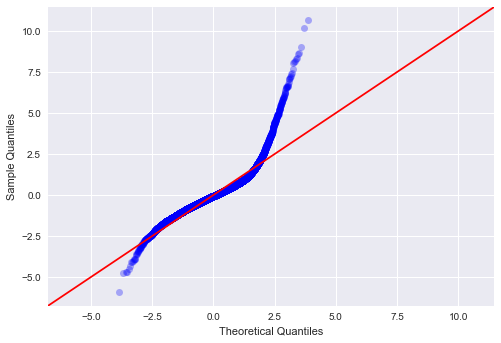

In [337]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, alpha = 0.3, line='45', fit=True)
fig.show()

The Q-Q plot clearly shows that for higher quantiles the model does not really work.

This behavior of the Q-Q plot could suggest that their are still outliers in the dataset that are affecting the model. In an earlier exercise, we removed outliers from some variables considering a z-score of 3.

It might be helpful to check outliers in the 'price' variable and remove any outliers that might exist. 

(array([8.077e+03, 7.510e+03, 1.867e+03, 4.100e+02, 1.480e+02, 5.700e+01,
        2.200e+01, 4.000e+00, 1.000e+00, 2.000e+00]),
 array([  78000.,  410200.,  742400., 1074600., 1406800., 1739000.,
        2071200., 2403400., 2735600., 3067800., 3400000.]),
 <a list of 10 Patch objects>)

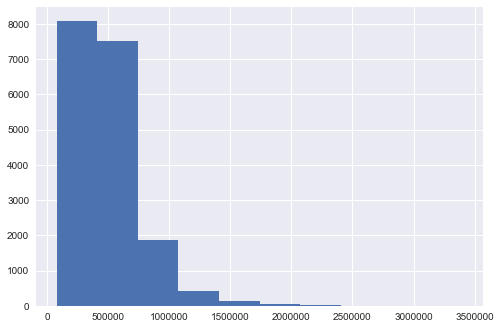

In [339]:
#We will plot a histogram for only the 'price' variable 
plt.hist(df_opt.price)

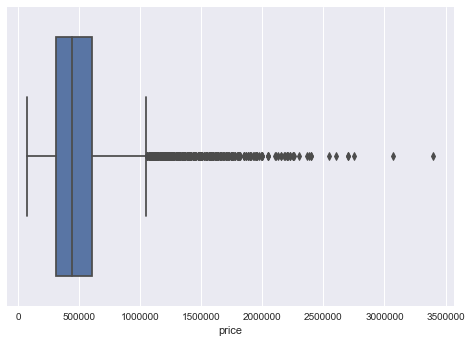

In [340]:
#Lets also plot a boxplot before analyzing results
sns.boxplot(x=df_opt['price'])

The 2 plots clearly suggest that house prices have some datapoints that are too far away from the mean. We can eliminate these numbers from our model as they sjew our findings quite a bit.

Lets do a z-score normalization on the pricing. We will use a SD of 3.

In [341]:
df_opt1= df_opt[np.abs(df_opt['price']-df_opt['price'].mean()) <= (3*df_opt['price'].std())]

(array([ 660., 4091., 4444., 3383., 2247., 1445.,  795.,  338.,  179.,
         159.]),
 array([  78000.,  199200.,  320400.,  441600.,  562800.,  684000.,
         805200.,  926400., 1047600., 1168800., 1290000.]),
 <a list of 10 Patch objects>)

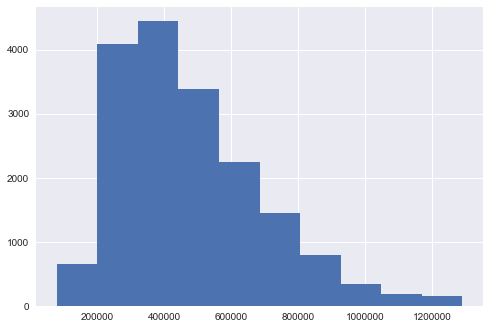

In [344]:
#Checking outliers after z-score normalization
plt.hist(df_opt1.price)

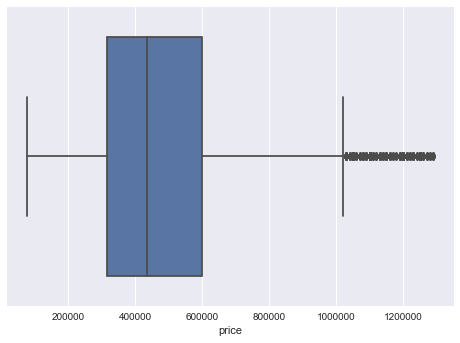

In [346]:
#Checking Box plot for the pricing after z-score normalization
sns.boxplot(x=df_opt1['price'])

The 2 plots show significant improvement in the normality of our price.

## Model 2

Lets create Model 2 with the optimized price, keeping other variables the same as model 1.  

In [394]:
X_data = df_opt1.drop('price', axis=1)
X_train_var = ['bathrooms', 'bedrooms', 'grade', 'condition','floors']
y_train = df_opt1['price']
X_train = one_hot_encoding(X_data, X_train_var)
model = sm.OLS(y_train, X_train).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     892.6
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:38:07   Log-Likelihood:            -2.3275e+05
No. Observations:               17741   AIC:                         4.656e+05
Df Residuals:                   17697   BIC:                         4.659e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
sqft_living       99.4533      2.733     36.390      0.000      94.096     104.810
sqft_lot          -0.6139      0.104     -5.909      0.000      -0.818      -0.410
waterfront       1.51e+05   1.83e+04      8.248      0.000    1.15e+05    1.87e+05
view            3.959e+04   1564.219     25.309      0.000    3.65e+04    4.27e+04
sqft_basement     -2.5338      3.280     -0.773      0.440      -8.962       3.895
yr_built       -1866.7566     54.126    -34.489      0.000   -1972.848   -1760.665
yr_renovated      14.4075      2.772      5.197      0.000       8.974      19.841
zipcode         -329.2186     21.874    -15.051      0.000    -372.094    -286.343
lat              5.69e+05   7135.526     79.743      0.000    5.55e+05    5.83e+05
long           -3.867e+04   8945.970     -4.323      0.000   -5.62e+04   -2.11e+04
bathrooms_0.5   2.792e+05   1.78e+05      1.565      0.117   -7.04e+04    6.29e+05
bathrooms_0.75  3.551e+05    1.7e+05      2.093      0.036    2.25e+04    6.88e+05
bathrooms_1.0   3.568e+05   1.69e+05      2.112      0.035    2.57e+04    6.88e+05
bathrooms_1.25  4.365e+05   1.76e+05      2.475      0.013    9.09e+04    7.82e+05
bathrooms_1.5   3.662e+05   1.69e+05      2.168      0.030    3.51e+04    6.97e+05
bathrooms_1.75  3.727e+05   1.69e+05      2.208      0.027    4.19e+04    7.04e+05
bathrooms_2.0   3.791e+05   1.69e+05      2.245      0.025    4.81e+04     7.1e+05
bathrooms_2.25  3.828e+05   1.69e+05      2.269      0.023    5.22e+04    7.13e+05
bathrooms_2.5   3.856e+05   1.69e+05      2.285      0.022    5.49e+04    7.16e+05
bathrooms_2.75   4.05e+05   1.69e+05      2.399      0.016    7.41e+04    7.36e+05
bathrooms_3.0   4.012e+05   1.69e+05      2.374      0.018    6.99e+04    7.32e+05
bathrooms_3.25  4.195e+05   1.69e+05      2.481      0.013    8.81e+04    7.51e+05
bathrooms_3.5   4.296e+05   1.69e+05      2.540      0.011    9.81e+04    7.61e+05
bathrooms_3.75  4.505e+05    1.7e+05      2.656      0.008    1.18e+05    7.83e+05
bathrooms_4.0   4.516e+05    1.7e+05      2.658      0.008    1.19e+05    7.85e+05
bedrooms_1      9.923e+05   4.22e+05      2.351      0.019    1.65e+05    1.82e+06
bedrooms_2      1.001e+06   4.22e+05      2.371      0.018    1.73e+05    1.83e+06
bedrooms_3      9.846e+05   4.22e+05      2.333      0.020    1.58e+05    1.81e+06
bedrooms_4      9.763e+05   4.22e+05      2.314      0.021    1.49e+05     1.8e+06
bedrooms_5      9.646e+05   4.22e+05      2.286      0.022    1.38e+05    1.79e+06
bedrooms_6      9.527e+05   4.22e+05      2.258      0.024    1.26e+05    1.78e+06
grade_5         8.157e+05   4.22e+05      1.935      0.053   -1.06e+04    1.64e+06
grade_6         8.468e+05   4.22e+05      2.006      0.045    1.96e+04    1.67e+06
grade_7         9.107e+05   4.22e+05      2.158      0.031    8.35e+04    1.74e+06
grade_8     

**Analyzing Model 2 OLS Results:** 

1. The p-values for some of the variables are greater than our 0.05 threshold. We will eliminate these variables using stepwise Selection. 
2. The R-Squared actually went down slightly from the first model.
3. We will need to check the model for its RMSE and Q-Q plot to understand the effect of removing outliers. 

In [395]:
# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)


scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([117650.73045732, 122474.808164  , 124256.43929937, 122833.33227168,
       121224.04027661, 120607.47160689, 119022.93646362, 118195.13016296,
       120498.26513508, 124122.41519722])

121088.5569034748

2219.48887405568

We see an improvement in both the Avg. price and the SD. Lets check the Q-Q plot to see if we made improvements in the normality of our curve.

/Users/vikasbansal/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


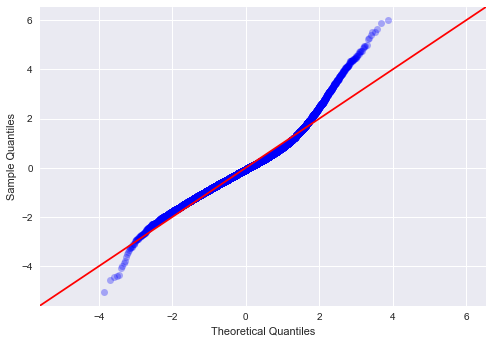

In [396]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, alpha = 0.3, line='45', fit=True)
fig.show()

The Q-Q plot has surely improved from Model-1. Their still seem to be some deviation for quantities higher than 2. 

## Model 3

Now We will do Stepwise Selection to remove p-values that are not significant.

In [397]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [359]:
# Get selected features using stepwise selection
selectedfeats = stepwise_selection(X_train, y_train, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=False)

/Users/vikasbansal/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [398]:
X_train = X_train[selectedfeats]

In [399]:
y_train = df_opt1['price']
model = sm.OLS(y_train, X_train).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                          1.012e+04
Date:                Sun, 25 Oct 2020   Prob (F-statistic):                        0.00
Time:                        19:38:31   Log-Likelihood:                     -2.3276e+05
No. Observations:               17741   AIC:                                  4.656e+05
Df Residuals:                   17710   BIC:                                  4.658e+05
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
sqft_living       98.4160      2.344     41.990      0.000      93.822     103.010
lat              5.69e+05   7111.438     80.013      0.000    5.55e+05    5.83e+05
view            3.925e+04   1547.711     25.358      0.000    3.62e+04    4.23e+04
grade_9          2.97e+05   9758.188     30.435      0.000    2.78e+05    3.16e+05
grade_10        3.776e+05   1.09e+04     34.621      0.000    3.56e+05    3.99e+05
yr_built       -1760.0972     45.532    -38.656      0.000   -1849.344   -1670.850
grade_8         1.805e+05   9148.904     19.731      0.000    1.63e+05    1.98e+05
grade_7         9.409e+04   8780.796     10.716      0.000    7.69e+04    1.11e+05
condition_5     5.784e+04   3653.723     15.830      0.000    5.07e+04     6.5e+04
floors_1.0     -2.538e+04   2233.776    -11.362      0.000   -2.98e+04    -2.1e+04
zipcode         -288.1575     12.096    -23.822      0.000    -311.867    -264.448
condition_4     2.578e+04   2269.067     11.361      0.000    2.13e+04    3.02e+04
waterfront      1.525e+05   1.82e+04      8.365      0.000    1.17e+05    1.88e+05
sqft_lot          -0.5996      0.102     -5.890      0.000      -0.799      -0.400
yr_renovated      15.4141      2.760      5.586      0.000      10.005      20.823
long           -3.923e+04   8798.783     -4.459      0.000   -5.65e+04    -2.2e+04
bathrooms_3.5   4.331e+04   6283.715      6.893      0.000     3.1e+04    5.56e+04
bedrooms_2      3.296e+04   4624.721      7.127      0.000    2.39e+04     4.2e+04
bathrooms_1.0  -2.362e+04   3531.871     -6.687      0.000   -3.05e+04   -1.67e+04
bathrooms_3.25  3.377e+04   6837.455      4.938      0.000    2.04e+04    4.72e+04
bathrooms_2.75  2.036e+04   4276.883      4.760      0.000     1.2e+04    2.87e+04
bedrooms_3      1.808e+04   3761.832      4.805      0.000    1.07e+04    2.55e+04
bathrooms_3.75  6.342e+04   1.57e+04      4.036      0.000    3.26e+04    9.42e+04
floors_3.0      2.007e+04   5894.116      3.405      0.001    8515.286    3.16e+04
floors_2.5      4.318e+04   1.25e+04      3.448      0.001    1.86e+04    6.77e+04
grade_6         3.014e+04   8882.289      3.393      0.001    1.27e+04    4.75e+04
bathrooms_1.5  -1.598e+04   3922.965     -4.072      0.000   -2.37e+04   -8286.822
bathrooms_1.75 -9668.1170   3008.039     -3.214      0.001   -1.56e+04   -3772.066
bathrooms_4.0   6.429e+04   1.82e+04      3.528      0.000    2.86e+04       1e+05
bathrooms_3.0   1.586e+04   5331.432      2.974      0.003    5405.375    2.63e+04
bedrooms_4      1.054e+04   3656.427      2.883      0.004    3372.851    1.77e+04
==============================================================================
Omnibus:                     2411.752   Durbin-Watson:                   1.982
Prob

In [400]:
linreg.fit(X_train, y_train)


scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([117547.30942581, 122507.56999475, 124229.39175169, 122737.29269341,
       121427.87493208, 120368.78402864, 119097.43121223, 118035.655699  ,
       120644.72954435, 124167.9796536 ])

121076.40189355619

2252.4109717045512

/Users/vikasbansal/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


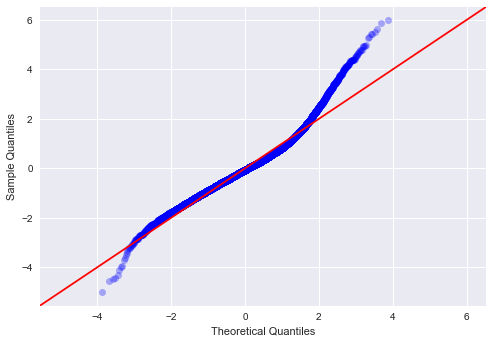

In [401]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, alpha = 0.3, line='45', fit=True)
fig.show()

The Q-Q plot does not seem to have changed much after stepwise selection.  

In [410]:
log_test = df_opt1.copy()

In [414]:
sqft_living_log = ['sqft_living']
for item in sqft_living_log:
    log_test[item] = log_test[item].map(lambda x: np.log(x))

In [415]:
X_data = log_test.drop('price', axis=1)
X_train_var = ['bathrooms', 'bedrooms', 'grade', 'condition','floors']
y_train = log_test['price']
X_train = one_hot_encoding(X_data, X_train_var)
model = sm.OLS(y_train, X_train).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     880.7
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:36:53   Log-Likelihood:            -2.3283e+05
No. Observations:               17741   AIC:                         4.657e+05
Df Residuals:                   17697   BIC:                         4.661e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
sqft_living     1.789e+05   5272.335     33.931      0.000    1.69e+05    1.89e+05
sqft_lot          -0.5223      0.104     -5.017      0.000      -0.726      -0.318
waterfront      1.413e+05   1.84e+04      7.681      0.000    1.05e+05    1.77e+05
view            4.052e+04   1570.196     25.807      0.000    3.74e+04    4.36e+04
sqft_basement      2.8108      3.269      0.860      0.390      -3.597       9.218
yr_built       -1841.1287     54.451    -33.813      0.000   -1947.857   -1734.400
yr_renovated      14.8760      2.785      5.342      0.000       9.417      20.335
zipcode         -328.3014     21.975    -14.940      0.000    -371.375    -285.228
lat               5.7e+05   7169.196     79.507      0.000    5.56e+05    5.84e+05
long           -3.537e+04   8984.090     -3.936      0.000    -5.3e+04   -1.78e+04
bathrooms_0.5   2.039e+05    1.8e+05      1.136      0.256   -1.48e+05    5.56e+05
bathrooms_0.75  2.843e+05   1.71e+05      1.665      0.096   -5.04e+04    6.19e+05
bathrooms_1.0   2.818e+05    1.7e+05      1.658      0.097   -5.14e+04    6.15e+05
bathrooms_1.25  3.458e+05   1.77e+05      1.948      0.051   -2080.574    6.94e+05
bathrooms_1.5   2.821e+05    1.7e+05      1.659      0.097   -5.12e+04    6.15e+05
bathrooms_1.75  2.847e+05    1.7e+05      1.675      0.094   -4.84e+04    6.18e+05
bathrooms_2.0   2.913e+05    1.7e+05      1.713      0.087   -4.19e+04    6.24e+05
bathrooms_2.25  2.945e+05    1.7e+05      1.734      0.083   -3.84e+04    6.27e+05
bathrooms_2.5    2.99e+05    1.7e+05      1.760      0.078    -3.4e+04    6.32e+05
bathrooms_2.75  3.223e+05    1.7e+05      1.896      0.058   -1.09e+04    6.56e+05
bathrooms_3.0   3.193e+05    1.7e+05      1.876      0.061   -1.43e+04    6.53e+05
bathrooms_3.25  3.434e+05    1.7e+05      2.017      0.044    9717.189    6.77e+05
bathrooms_3.5   3.562e+05    1.7e+05      2.092      0.036    2.25e+04     6.9e+05
bathrooms_3.75  3.846e+05   1.71e+05      2.253      0.024    4.99e+04    7.19e+05
bathrooms_4.0   3.818e+05   1.71e+05      2.232      0.026    4.65e+04    7.17e+05
bedrooms_1      8.104e+05   4.25e+05      1.907      0.057   -2.25e+04    1.64e+06
bedrooms_2      8.006e+05   4.25e+05      1.884      0.060   -3.24e+04    1.63e+06
bedrooms_3      7.753e+05   4.25e+05      1.825      0.068   -5.74e+04    1.61e+06
bedrooms_4      7.695e+05   4.25e+05      1.811      0.070   -6.32e+04     1.6e+06
bedrooms_5      7.637e+05   4.25e+05      1.798      0.072   -6.89e+04     1.6e+06
bedrooms_6      7.554e+05   4.25e+05      1.778      0.075   -7.73e+04    1.59e+06
grade_5         6.238e+05   4.24e+05      1.470      0.142   -2.08e+05    1.46e+06
grade_6         6.443e+05   4.25e+05      1.517      0.129   -1.88e+05    1.48e+06
grade_7             7e+05   4.25e+05      1.647      0.099   -1.33e+05    1.53e+06
grade_8     

In [416]:
selectedfeats = stepwise_selection(X_train, y_train, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=False)

/Users/vikasbansal/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [417]:
X_train = X_train[selectedfeats]

In [418]:
model = sm.OLS(y_train, X_train).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                          1.109e+04
Date:                Sun, 25 Oct 2020   Prob (F-statistic):                        0.00
Time:                        21:38:43   Log-Likelihood:                     -2.3285e+05
No. Observations:               17741   AIC:                                  4.658e+05
Df Residuals:                   17713   BIC:                                  4.660e+05
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
sqft_living     1.859e+05   4357.309     42.671      0.000    1.77e+05    1.94e+05
lat             5.709e+05   7123.574     80.147      0.000    5.57e+05    5.85e+05
view            4.039e+04   1553.113     26.004      0.000    3.73e+04    4.34e+04
grade_9         2.714e+05   5304.903     51.163      0.000    2.61e+05    2.82e+05
grade_10        3.643e+05   7046.170     51.707      0.000    3.51e+05    3.78e+05
yr_built       -1774.2939     49.434    -35.892      0.000   -1871.190   -1677.398
grade_8         1.461e+05   4216.891     34.643      0.000    1.38e+05    1.54e+05
grade_7         5.852e+04   3475.632     16.838      0.000    5.17e+04    6.53e+04
condition_5     6.031e+04   3643.230     16.554      0.000    5.32e+04    6.75e+04
floors_1.0     -5.117e+04   5626.003     -9.094      0.000   -6.22e+04   -4.01e+04
zipcode         -299.5752     12.113    -24.732      0.000    -323.318    -275.833
condition_4     2.645e+04   2280.909     11.597      0.000     2.2e+04    3.09e+04
bedrooms_2      3.083e+04   3757.138      8.206      0.000    2.35e+04    3.82e+04
bathrooms_3.5   6.383e+04   6602.768      9.667      0.000    5.09e+04    7.68e+04
waterfront      1.418e+05   1.83e+04      7.741      0.000    1.06e+05    1.78e+05
sqft_lot          -0.5334      0.102     -5.214      0.000      -0.734      -0.333
yr_renovated      16.1139      2.770      5.818      0.000      10.685      21.543
bathrooms_3.25  5.141e+04   7091.681      7.249      0.000    3.75e+04    6.53e+04
bathrooms_2.75  3.191e+04   4499.640      7.092      0.000    2.31e+04    4.07e+04
bathrooms_3.75  9.065e+04   1.58e+04      5.725      0.000    5.96e+04    1.22e+05
long           -3.847e+04   8813.936     -4.364      0.000   -5.57e+04   -2.12e+04
bathrooms_4.0   8.782e+04   1.83e+04      4.786      0.000    5.19e+04    1.24e+05
bathrooms_3.0   2.799e+04   5515.530      5.075      0.000    1.72e+04    3.88e+04
floors_1.5     -3.487e+04   6663.035     -5.233      0.000   -4.79e+04   -2.18e+04
floors_2.0     -2.265e+04   5393.066     -4.200      0.000   -3.32e+04   -1.21e+04
bedrooms_1      3.842e+04   1.03e+04      3.747      0.000    1.83e+04    5.85e+04
bathrooms_2.5   8990.4601   2885.952      3.115      0.002    3333.712    1.46e+04
bedrooms_3      6909.4643   2307.595      2.994      0.003    2386.353    1.14e+04
==============================================================================
Omnibus:                     2365.890   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5724.230
Skew:                           0.772   Prob(JB):                         0.00
Kurtosis:                       5.315   Cond. No.                     2.00e+06
================

In [419]:
# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)


scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([118215.67988922, 123262.95582514, 124186.61041543, 122750.01552755,
       121855.90177073, 121450.3745585 , 120196.4454753 , 119066.51156078,
       120893.40402739, 124347.12105084])

121622.50201008687

1968.4873593651525

/Users/vikasbansal/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


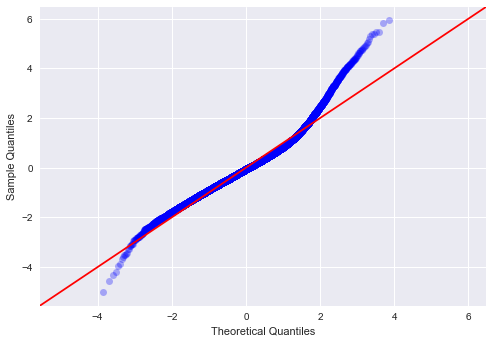

In [421]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, alpha = 0.3, line='45', fit=True)
fig.show()

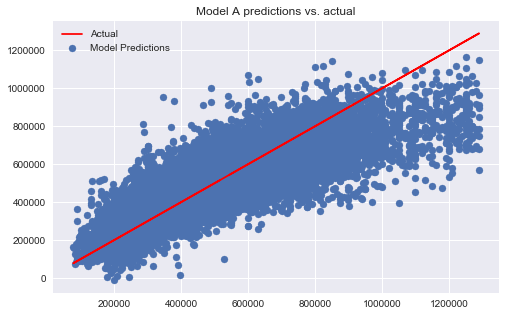

In [420]:
# Get predictions
y_pred = model.predict(X_train)

# Create a matplotlib figure
plt.figure(figsize=(8, 5))
# Create a scatter plot
plt.scatter(y_train, y_pred, label='Model Predictions')
plt.plot(y_train, y_train, label='Actual', color='r')
plt.title('Model A predictions vs. actual')
plt.legend()
plt.show()